In [2]:
import pandas as pd
import numpy as np

In [3]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  path_prefix = '/content/drive/MyDrive/Great Learning/DBA/Walsh-MS-QM640CapstoneProject/'
  print("Running in Google Colab.")
else:
  path_prefix = './'
  print("Not running in Google Colab.")

print(f"Using path prefix: {path_prefix}")

Not running in Google Colab.
Using path prefix: ./


In [4]:
df = pd.read_excel(f"{path_prefix}scored/reviews_predicted_eng.xlsx")
print(df.shape)
df.head()

(53719, 20)


,reviewId,reviewContent,rating,reviewedAt,replyContent,repliedAt,store,app_name,at_year,at_month,country,at_calc,at_eta_date,reply_in,reply_eta,sla_status,responded_by,language_pred,department_pred,sentiment_pred
0,a2393404-7755-4564-add7-b3029159bb71,the application now for 4 days is not opening ...,1,2025-07-01 02:04:14,Sorry to hear you're having trouble with the a...,2025-07-01 12:49:59,Google Play Store,ADCB,2025,7,NaN,2025-07-01 08:00:00,2025-07-01 20:00:00,4.833056,0.298623,SLA Met,A.E,en,Application,Negative
1,f521326b-0ffb-4620-8995-b04eeee01c8f,normal,3,2025-06-30 22:17:54,NaN,NaT,Google Play Store,ADCB,2025,6,NaN,2025-07-01 08:00:00,2025-07-01 20:00:00,NaN,-1000.000000,Not Responded,NaN,en,General,Neutral
2,6262b57b-7c21-4f6b-9a6a-b4fa8d60b395,good,5,2025-06-30 21:42:32,"Hello, thank you for the encouraging star rati...",2025-07-01 12:49:03,Google Play Store,ADCB,2025,6,NaN,2025-07-01 08:00:00,2025-07-01 20:00:00,4.817500,0.299271,SLA Met,A.E,en,General,Positive
3,1780c47d-38ad-4563-92c3-c381b717171f,good thank you,5,2025-06-30 19:14:18,"Hello, thank you for the encouraging star rati...",2025-07-01 12:49:00,Google Play Store,ADCB,2025,6,NaN,2025-06-30 19:14:18,2025-07-01 19:14:18,5.578333,0.267569,SLA Met,A.E,en,General,Positive
4,5083ac69-2298-45ee-9b96-1912e10dfed6,Dear adcb bank i had a trouble on the Applicat...,5,2025-06-30 19:08:16,Sorry to hear you're having trouble with the a...,2025-07-01 12:49:52,Google Play Store,ADCB,2025,6,NaN,2025-06-30 19:08:16,2025-07-01 19:08:16,5.693333,0.262778,SLA Met,A.E,en,Application,Negative


In [5]:
# Rename columns for clarity in RAG pipeline context
df = df.rename(columns={
    'reviewId': 'review_id',
    'reviewContent': 'review_text',
    'rating': 'star_rating',
    'reviewedAt': 'review_date',
    'replyContent': 'reply_text',
    'repliedAt': 'reply_date',
    'store': 'app_store',
    'app_name': 'app_name',
    'at_year': 'year',
    'at_month': 'month',
    'country': 'country',
    'at_calc': 'calc_date',
    'at_eta_date': 'eta_date',
    'reply_in': 'reply_time_hrs',
    'reply_eta': 'reply_eta',
    'sla_status': 'sla_status',
    'responded_by': 'responded_by',
    'language_pred': 'language',
    'department_pred': 'department',
    'sentiment_pred': 'sentiment'
})

print("Columns renamed for RAG pipeline clarity.")
df.head()

Columns renamed for RAG pipeline clarity.


,review_id,review_text,star_rating,review_date,reply_text,reply_date,app_store,app_name,year,month,country,calc_date,eta_date,reply_time_hrs,reply_eta,sla_status,responded_by,language,department,sentiment
0,a2393404-7755-4564-add7-b3029159bb71,the application now for 4 days is not opening ...,1,2025-07-01 02:04:14,Sorry to hear you're having trouble with the a...,2025-07-01 12:49:59,Google Play Store,ADCB,2025,7,NaN,2025-07-01 08:00:00,2025-07-01 20:00:00,4.833056,0.298623,SLA Met,A.E,en,Application,Negative
1,f521326b-0ffb-4620-8995-b04eeee01c8f,normal,3,2025-06-30 22:17:54,NaN,NaT,Google Play Store,ADCB,2025,6,NaN,2025-07-01 08:00:00,2025-07-01 20:00:00,NaN,-1000.000000,Not Responded,NaN,en,General,Neutral
2,6262b57b-7c21-4f6b-9a6a-b4fa8d60b395,good,5,2025-06-30 21:42:32,"Hello, thank you for the encouraging star rati...",2025-07-01 12:49:03,Google Play Store,ADCB,2025,6,NaN,2025-07-01 08:00:00,2025-07-01 20:00:00,4.817500,0.299271,SLA Met,A.E,en,General,Positive
3,1780c47d-38ad-4563-92c3-c381b717171f,good thank you,5,2025-06-30 19:14:18,"Hello, thank you for the encouraging star rati...",2025-07-01 12:49:00,Google Play Store,ADCB,2025,6,NaN,2025-06-30 19:14:18,2025-07-01 19:14:18,5.578333,0.267569,SLA Met,A.E,en,General,Positive
4,5083ac69-2298-45ee-9b96-1912e10dfed6,Dear adcb bank i had a trouble on the Applicat...,5,2025-06-30 19:08:16,Sorry to hear you're having trouble with the a...,2025-07-01 12:49:52,Google Play Store,ADCB,2025,6,NaN,2025-06-30 19:08:16,2025-07-01 19:08:16,5.693333,0.262778,SLA Met,A.E,en,Application,Negative


In [6]:
df['sla_status'].unique()

array(['SLA Met', 'Not Responded', 'SLA Missed'], dtype=object)

In [5]:
%pip install sentence-transformers faiss-cpu transformers torch

In [7]:
# Install required libraries (uncomment if running for the first time)
from sentence_transformers import SentenceTransformer
import faiss
from transformers import pipeline
import torch
import openai
import os
import re
print('Libraries imported for RAG pipeline.')

Libraries imported for RAG pipeline.


In [10]:
# Generate embeddings for review_text using OpenAI text-embedding-3-large
from tqdm import tqdm

openai_embed_model = "text-embedding-3-large"
openai_client = openai.OpenAI(api_key=os.getenv('OPENAI_API_KEY'))

# Drop NA reviews for embedding
texts = df['review_text'].fillna('').tolist()

# Batch embedding for efficiency
def get_openai_embeddings(texts, batch_size=100):
    all_embeds = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = [str(t) if t is not None else "" for t in texts[i:i+batch_size]]
        # Remove empty strings (OpenAI API does not accept them)
        batch = [t for t in batch if t.strip()]
        if not batch:
            continue
        response = openai_client.embeddings.create(
            input=batch,
            model=openai_embed_model
        )
        batch_embeds = [d.embedding for d in response.data]
        all_embeds.extend(batch_embeds)
    return np.array(all_embeds)

In [ ]:
embeddings = get_openai_embeddings(texts)

# Save embeddings to disk for reuse
embeddings_path = f"{path_prefix}scored/review_embeddings_openai.npy"
np.save(embeddings_path, embeddings)
print(f"Embeddings saved to {embeddings_path}. To reload, use: np.load(embeddings_path)")

100%|██████████| 538/538 [19:40<00:00,  2.19s/it]


Embeddings saved to ./scored/review_embeddings_openai.npy. To reload, use: np.load(embeddings_path)


In [8]:
# Reload embeddings from disk
embeddings_path = f"{path_prefix}scored/review_embeddings_openai.npy"
embeddings = np.load(embeddings_path)
print(f"Embeddings reloaded from {embeddings_path}. Shape: {embeddings.shape}")

Embeddings reloaded from ./scored/review_embeddings_openai.npy. Shape: (53719, 3072)


In [13]:
# Build FAISS index
index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(embeddings)

print(f"FAISS index built with {len(texts)} reviews using OpenAI text-embedding-3-large.")

faiss.write_index(index, f"{path_prefix}scored/review_faiss_index.bin")
print("FAISS index saved to disk.")

FAISS index built with 53719 reviews using OpenAI text-embedding-3-large.
FAISS index saved to disk.


In [14]:
## Load FAISS index from disk

index = faiss.read_index(f"{path_prefix}scored/review_faiss_index.bin")
print("FAISS index loaded from disk.")

FAISS index loaded from disk.


In [ ]:
from transformers import pipeline

# Load a small, fast model for intent classification (can use distilbert-base-uncased or similar)
intent_classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

c:\Users\user\anaconda3\envs\gen_ai\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Fallin

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Device set to use cpu


In [81]:
client = openai.OpenAI(api_key=os.getenv('OPENAI_API_KEY'))

# Hybrid RAG pipeline: intent detection, semantic & structured (pandas) search, LLM-assisted text-to-pandas

def detect_intent(prompt):
    """Very simple intent detection: if prompt contains keywords, treat as structured; else semantic."""
    structured_keywords = ["show", "which", "list", "count", "number of", "average", "sum ", "group by", "table", "sql", "pandas"]
    for kw in structured_keywords:
        if kw in prompt.lower():
            return "structured"
    return "semantic"

def detect_intent_model(prompt):
    # Predict intent using the classifier
    result = intent_classifier(prompt)[0]
    # Map model output to your intents (customize as needed)
    if result['label'] == 'POSITIVE':
        return "structured"
    else:
        return "semantic"
    
def resolve_intent(prompt):
    # Get intent from both methods
    intent_keyword = detect_intent(prompt)
    print("Intent detection using simple keywords:", intent_keyword)
    intent_model = detect_intent_model(prompt)
    print("Intent detection using pretrained classifier:", intent_model)

    # If both agree, use that intent
    if intent_keyword == intent_model:
        return intent_keyword
    # If model is confident (e.g., high score), prefer model
    # You can modify detect_intent_model to return (intent, score) for more control
    # For now, if model says 'structured', prefer it for tabular/aggregation queries
    if intent_model == "structured" and any(kw in prompt.lower() for kw in ["show", "list", "count", "group by", "table", "sql", "pandas"]):
        return "structured"
    # Otherwise, default to keyword-based intent
    return intent_keyword

# Column descriptions for the DataFrame
df_column_descriptions = {
    'review_id': 'Unique review identifier',
    'review_text': 'Text of the customer review',
    'star_rating': 'Star rating given by the user (numeric)',
    'review_date': 'Date of the review (datetime)',
    'reply_text': 'Text of the reply from support (if any)',
    'reply_date': 'Date of the reply (datetime, if any)',
    'app_store': 'App store source (Google Play or Apple)',
    'app_name': 'Name of the app',
    'year': 'Year of the review',
    'month': 'Month of the review',
    'country': 'Country of the reviewer',
    'calc_date': 'Calculated date field (if present)',
    'eta_date': 'Estimated time of arrival date (if present)',
    'reply_time_days': 'Reply time in days',
    'reply_eta': 'Reply ETA (if present)',
    'sla_status': 'SLA status for the reply',
    'responded_by': 'Name or ID of the responder',
    'language': 'Predicted language of the review',
    'department': 'Predicted department for the review',
    'sentiment': 'Predicted sentiment label',
}

# LLM-assisted text-to-pandas code generation
def generate_pandas_code(prompt, df_name="df"):
    # Get unique values for key columns
    sentiment_values = df['sentiment'].unique().tolist() if 'sentiment' in df.columns else []
    department_values = df['department'].unique().tolist() if 'department' in df.columns else []
    sla_status_values = df['sla_status'].unique().tolist() if 'sla_status' in df.columns else []
    language_values = df['language'].unique().tolist() if 'language' in df.columns else []
    app_name_values = df['app_name'].unique().tolist() if 'app_name' in df.columns else []
    app_store_values = df['app_store'].unique().tolist() if 'app_store' in df.columns else []

    column_info = "\n".join([f"{col}: {desc}" for col, desc in df_column_descriptions.items()])
    value_info = (
        f"sentiment possible values: {sentiment_values}\n"
        f"department possible values: {department_values}\n"
        f"sla_status possible values: {sla_status_values}\n"
        f"language possible values: {language_values}\n"
        f"app_name possible values: {app_name_values}\n"
        f"app_store possible values: {app_store_values}"
    )
    system_msg = (
        "You are a Python data analyst. Given a user request and a pandas DataFrame called 'df', "
        "write a single line of pandas code to answer the request. Only output the code, no explanation.\n"
        f"DataFrame columns and descriptions:\n{column_info}\n"
        f"{value_info}"
    )
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": system_msg},
            {"role": "user", "content": prompt}
        ],
        max_tokens=128,
        temperature=0.0
    )
    code = response.choices[0].message.content.strip()
    return code

def hybrid_rag(prompt, k=10):
    # intent = resolve_intent(prompt)
    intent = detect_intent(prompt)
    if intent == "semantic":
        # Use semantic RAG pipeline
        print("Using semantic RAG pipeline")
        query_emb = openai_client.embeddings.create(
            input=[prompt],
            model=openai_embed_model
        ).data[0].embedding
        query_emb = np.array(query_emb, dtype=np.float32).reshape(1, -1)
        D, I = index.search(query_emb, k)
        retrieved_texts = [texts[i] for i in I[0]]
        context = "\n".join(retrieved_texts)
        rag_prompt = f"Context:\n{context}\n\nQuestion: {prompt}\nAnswer:"
        strict_system_msg = (
            "You are a helpful assistant for customer experience analytics. "
            "Only answer based on the provided context you may summarize or synthesize from the context, but do not hallucinate."
        )
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": strict_system_msg},
                {"role": "user", "content": rag_prompt}
            ],
            max_tokens=256,
            temperature=0.2
        )
        answer = response.choices[0].message.content.strip()
        if answer.strip().lower().startswith("i don't know based on the search results"):
            print("\nNo answer found in search results. Here are the top retrieved review excerpts:\n")
            print(context)
        return answer
    else:
        print("Using structured RAG pipeline")
        # Use LLM to generate pandas code, then execute and return result
        code = generate_pandas_code(prompt)
        print(f"Generated pandas code: {code}")
        # Remove markdown code block formatting if present
        code = code.strip()
        # Remove triple backticks and language tags
        if code.startswith("```"):
            code = code.replace("```python", "").replace("```", "").strip()
        # Remove single backticks if present
        if code.startswith("`") and code.endswith("`"):
            code = code[1:-1].strip()
        # Remove any remaining lines starting with triple backticks
        code = "\n".join([line for line in code.splitlines() if not line.strip().startswith("```")]).strip()
        try:
            result = eval(code)
            # Handle empty results
            if hasattr(result, 'empty') and result.empty:
                result = "No results found for this query."
            elif isinstance(result, (pd.Series, pd.DataFrame)) and result.shape[0] == 0:
                result = "No results found for this query."
        except Exception as e:
            result = f"Error executing code: {e}"
        return result

print("Hybrid RAG pipeline ready: use hybrid_rag(prompt) for both semantic and structured queries.")

Hybrid RAG pipeline ready: use hybrid_rag(prompt) for both semantic and structured queries.


In [67]:
# Example: Operational CX query using RAG pipeline
sample_query = "List all departments mentioned in the reviews."
rag_answer = hybrid_rag(sample_query)
print(f"Q: {sample_query}\nA: {rag_answer}")

Intent detection using simple keywords: structured
Intent detection using pretrained classifier: structured
Using structured RAG pipeline
Generated pandas code: df['department'].unique()
Q: List all departments mentioned in the reviews.
A: ['Application' 'General' 'CustomerService' 'TransfersPayments'
 'FeesCharges' 'Cards' 'Offers' 'CASA' 'Fraud' 'Deposits' 'Investment']


In [68]:
# Example: Operational CX query using RAG pipeline
sample_query = "show department which had most complaints?"
rag_answer = hybrid_rag(sample_query)
print(f"Q: {sample_query}\nA: {rag_answer}")

Intent detection using simple keywords: structured
Intent detection using pretrained classifier: semantic
Using structured RAG pipeline
Generated pandas code: ```python
df[df['sentiment'] == 'Negative']['department'].value_counts().idxmax()
```
Q: show department which had most complaints?
A: Application


In [77]:
# Example: Operational CX query using RAG pipeline
sample_query = "List all apps with reviews in Arabic language."
rag_answer = hybrid_rag(sample_query)
print(f"Q: {sample_query}\nA: {rag_answer}")

Intent detection using simple keywords: structured
Intent detection using pretrained classifier: structured
Using structured RAG pipeline
Intent detection using pretrained classifier: structured
Using structured RAG pipeline
Generated pandas code: ```python
df[df['language'] != 'en']['app_name'].unique()
```
Q: List all apps with reviews in Arabic language.
A: []
Generated pandas code: ```python
df[df['language'] != 'en']['app_name'].unique()
```
Q: List all apps with reviews in Arabic language.
A: []


In [69]:
# Example: Operational CX query using RAG pipeline
sample_query = "which bank had most compliant SLA Status?"
rag_answer = hybrid_rag(sample_query)
print(f"Q: {sample_query}\nA: {rag_answer}")

Intent detection using simple keywords: structured
Intent detection using pretrained classifier: semantic
Using structured RAG pipeline
Generated pandas code: ```python
df[df['sla_status'] == 'SLA Met']['app_name'].value_counts().idxmax()
```
Q: which bank had most compliant SLA Status?
A: ADCB


In [70]:
# Example: Operational CX query using RAG pipeline
sample_query = "Count reviews with negative sentiment for each app."
rag_answer = hybrid_rag(sample_query)
print(f"Q: {sample_query}\nA: {rag_answer}")

Intent detection using simple keywords: structured
Intent detection using pretrained classifier: semantic
Using structured RAG pipeline
Generated pandas code: ```python
df[df['sentiment'] == 'Negative'].groupby('app_name').size()
```
Q: Count reviews with negative sentiment for each app.
A: app_name
ADCB        2234
ADIB         992
Citibank     827
DIB         2544
EI Bank      519
ENBD        5857
FAB         2451
HSBC         862
Mashreq     2870
RAKBANK     1179
SC Bank      295
dtype: int64


In [71]:
# Example: Semantic query using RAG pipeline (should trigger semantic search, not structured)
semantic_query = "What are some common themes or issues mentioned by users in their reviews?"
rag_semantic_answer = hybrid_rag(semantic_query)
print(f"Q: {semantic_query}\nA: {rag_semantic_answer}")

Intent detection using simple keywords: semantic
Intent detection using pretrained classifier: semantic
Using semantic RAG pipeline
Q: What are some common themes or issues mentioned by users in their reviews?
A: Some common themes or issues mentioned by users in their reviews include:

1. **General Issues**: Users frequently mention that the app has a lot of issues, indicating a broad dissatisfaction with its performance.

2. **New User Experience**: There are specific issues faced by new users, suggesting that the onboarding process or initial setup might be problematic.

3. **Download Problems**: Some users experience issues when downloading the app, which could point to technical difficulties or compatibility problems.

4. **Lack of Features and Functionality**: Users note a lack of features and limited functionality, indicating that the app may not meet their needs or expectations.

5. **Poor Performance**: Performance issues are highlighted, suggesting that the app may be slow or

In [72]:
# Example: Semantic query using RAG pipeline (should trigger semantic search, not structured)
semantic_query = "What are some common issues mentioned by users in their reviews related to cards?"
rag_semantic_answer = hybrid_rag(semantic_query)
print(f"Q: {semantic_query}\nA: {rag_semantic_answer}")

Intent detection using simple keywords: semantic
Intent detection using pretrained classifier: semantic
Using semantic RAG pipeline
Q: What are some common issues mentioned by users in their reviews related to cards?
A: Some common issues mentioned by users in their reviews related to cards include:

1. **Bugs and App Crashes**: Users report that the app frequently crashes, especially when trying to manage cards, and there are persistent bugs that have not been addressed for months.

2. **Lack of Information and Features**: Key card details such as statement date, payment date, last payment amount, and balance are difficult to locate. Users also mention the inability to send payments by IBAN, generate codes, or request support through the app.

3. **Missing Cards**: Certain types of cards, like student debit cards, do not appear on the home page, limiting access to functionalities like freezing the card or viewing transaction history.

4. **Hidden Charges and Miscommunication**: Users 

In [82]:
# RAG evaluation: test the hybrid_rag pipeline with example queries and expected answers

example_queries = [
    {
        "query": "List all departments mentioned in the reviews.",
        "expected_type": "structured"
    },
    {
        "query": "What do users say about mobile app performance?",
        "expected_type": "semantic"
    },
    {
        "query": "Count reviews with negative sentiment for each app.",
        "expected_type": "structured"
    },
    {
        "query": "Summarize feedback about customer support.",
        "expected_type": "semantic"
    }
]

for ex in example_queries:
    print(f"\nQuery: {ex['query']}")
    result = hybrid_rag(ex['query'])
    print(f"Result:\n{result}\n{'-'*60}")


Query: List all departments mentioned in the reviews.
Using structured RAG pipeline
Generated pandas code: `df['department'].unique()`
Result:
['Application' 'General' 'CustomerService' 'TransfersPayments'
 'FeesCharges' 'Cards' 'Offers' 'CASA' 'Fraud' 'Deposits' 'Investment']
------------------------------------------------------------

Query: What do users say about mobile app performance?
Using semantic RAG pipeline
Generated pandas code: `df['department'].unique()`
Result:
['Application' 'General' 'CustomerService' 'TransfersPayments'
 'FeesCharges' 'Cards' 'Offers' 'CASA' 'Fraud' 'Deposits' 'Investment']
------------------------------------------------------------

Query: What do users say about mobile app performance?
Using semantic RAG pipeline
Result:
Users have mixed feedback about the mobile app performance. Some users describe the app as having "superb" or "excellent" performance, while others express concerns about the app being slow and note that its performance has degra

In [85]:
# RAG pipeline performance evaluation: expanded query set and metrics
import time

evaluation_queries = [
    {"query": "List all departments mentioned in the reviews.", "expected_type": "structured"},
    {"query": "What do users say about mobile app performance?", "expected_type": "semantic"},
    {"query": "Count reviews with negative sentiment for each app.", "expected_type": "structured"},
    {"query": "Summarize feedback about customer support.", "expected_type": "semantic"},
    {"query": "Which app has the highest average rating?", "expected_type": "structured"},
    {"query": "What are common complaints about card services?", "expected_type": "semantic"},
    {"query": "Show number of reviews by language.", "expected_type": "structured"},
    {"query": "Summarize feedback about login issues.", "expected_type": "semantic"},
    {"query": "List all unique SLA statuses in the reviews.", "expected_type": "structured"},
    {"query": "What do users say about app updates?", "expected_type": "semantic"},
    {"query": "Which department received the most positive reviews?", "expected_type": "structured"},
    {"query": "Summarize feedback about payment failures.", "expected_type": "semantic"},
    {"query": "Show average reply time by app.", "expected_type": "structured"},
    {"query": "What are common issues with onboarding?", "expected_type": "semantic"},
    {"query": "List all countries represented in the reviews.", "expected_type": "structured"},
    {"query": "Summarize feedback about security concerns.", "expected_type": "semantic"},
    {"query": "Show number of reviews by star rating.", "expected_type": "structured"},
    {"query": "What do users say about customer service response time?", "expected_type": "semantic"},
    {"query": "Which app store has more reviews?", "expected_type": "structured"},
    {"query": "Summarize feedback about app crashes.", "expected_type": "semantic"},
    {"query": "Show number of reviews per month for 2024.", "expected_type": "structured"},
    {"query": "What are common complaints about account access?", "expected_type": "semantic"},
    {"query": "List all apps with reviews in Arabic language.", "expected_type": "structured"},
    {"query": "Summarize feedback about notifications.", "expected_type": "semantic"},
    {"query": "Show number of reviews with SLA status 'SLA Not met'.", "expected_type": "structured"},
    {"query": "Summarize feedback about app speed.", "expected_type": "semantic"},
    {"query": "Show reviews with star rating less than 3.", "expected_type": "structured"},
    {"query": "What do users say about password reset process?", "expected_type": "semantic"},
    {"query": "List all apps reviewed in 2025.", "expected_type": "structured"},
    {"query": "Summarize feedback about transaction failures.", "expected_type": "semantic"},
    {"query": "Show number of reviews by department.", "expected_type": "structured"},
    {"query": "What are common complaints about mobile deposits?", "expected_type": "semantic"},
    {"query": "List all reviews from India.", "expected_type": "structured"},
    {"query": "Summarize feedback about app navigation.", "expected_type": "semantic"},
    {"query": "Show reviews with reply time greater than 24 hours.", "expected_type": "structured"},
    {"query": "What do users say about push notifications?", "expected_type": "semantic"},
    {"query": "List all reviews with sentiment 'Neutral'.", "expected_type": "structured"},
    {"query": "Summarize feedback about multi-factor authentication.", "expected_type": "semantic"},
    {"query": "Show reviews for app 'ADCB'.", "expected_type": "structured"},
    {"query": "What are common complaints about customer onboarding?", "expected_type": "semantic"},
    {"query": "List all reviews with SLA status 'SLA Met'.", "expected_type": "structured"},
    {"query": "Summarize feedback about mobile check deposit.", "expected_type": "semantic"},
    {"query": "Show reviews by month for app 'ADIB'.", "expected_type": "structured"},
    {"query": "What do users say about app reliability?", "expected_type": "semantic"},
    {"query": "List all reviews with language 'English'.", "expected_type": "structured"},
    {"query": "Summarize feedback about customer loyalty programs.", "expected_type": "semantic"},
    {"query": "Show reviews with star rating 5.", "expected_type": "structured"},
    {"query": "What are common complaints about mobile payments?", "expected_type": "semantic"},
    {"query": "List all reviews with reply ETA less than 2 hours.", "expected_type": "structured"},
    {"query": "Summarize feedback about app design.", "expected_type": "semantic"}
]

results = []
for ex in evaluation_queries:
    start_time = time.time()
    # intent = resolve_intent(ex['query'])
    intent = detect_intent(ex['query'])
    result = hybrid_rag(ex['query'])
    latency = time.time() - start_time
    results.append({
        'query': ex['query'],
        'expected_type': ex['expected_type'],
        'detected_intent': intent,
        'result': result,
        'latency_sec': latency
    })

# Calculate metrics
total = len(results)
correct_intent = sum(r['expected_type'] == r['detected_intent'] for r in results)
accuracy = correct_intent / total
avg_latency = sum(r['latency_sec'] for r in results) / total
error_count = sum(isinstance(r['result'], str) and r['result'].startswith('Error') for r in results)
error_rate = error_count / total

print(f"RAG Pipeline Evaluation Results:")
for r in results:
    print(f"Query: {r['query']}")
    print(f"Expected: {r['expected_type']}, Detected: {r['detected_intent']}, Latency: {r['latency_sec']:.2f}s")
    print(f"Result: {r['result']}")
    print('-'*60)

print(f"\nIntent Detection Accuracy: {accuracy:.2%}")
print(f"Average Latency: {avg_latency:.2f} seconds")
print(f"Error Rate: {error_rate:.2%}")

# Coverage: percent of queries answered (not error)
answered_count = sum(not (isinstance(r['result'], str) and r['result'].startswith('Error')) for r in results)
coverage = answered_count / total
print(f"Coverage: {coverage:.2%}")

Using structured RAG pipeline
Generated pandas code: `df['department'].unique()`
Using semantic RAG pipeline
Generated pandas code: `df['department'].unique()`
Using semantic RAG pipeline
Using structured RAG pipeline
Using structured RAG pipeline
Generated pandas code: ```python
df[df['sentiment'] == 'Negative'].groupby('app_name').size()
```
Using semantic RAG pipeline
Generated pandas code: ```python
df[df['sentiment'] == 'Negative'].groupby('app_name').size()
```
Using semantic RAG pipeline
Using structured RAG pipeline
Using structured RAG pipeline
Generated pandas code: ```python
df.groupby('app_name')['star_rating'].mean().idxmax()
```
Using semantic RAG pipeline
Generated pandas code: ```python
df.groupby('app_name')['star_rating'].mean().idxmax()
```
Using semantic RAG pipeline
Using structured RAG pipeline
Using structured RAG pipeline
Generated pandas code: ```python
df['language'].value_counts()
```
Using semantic RAG pipeline
Generated pandas code: ```python
df['language']

## Summary

### Intent Detection Accuracy (98.00%): Out of all queries, 98% were correctly classified as either "structured" or "semantic" by intent detection logic. This shows pipeline is highly effective at routing queries to the right processing path.

### Average Latency (1.93 seconds): On average, each query took 1.93 seconds to process and return a result. This includes intent detection, retrieval, LLM code generation, and execution.

### Error Rate (6.00%): 6% of queries resulted in an error (e.g., code execution failed, invalid output, or other exceptions). Lower error rates indicate more robust code generation and execution. There is scope for improvement.

### Coverage (94.00%): 94% of queries received a valid answer (not an error). High coverage means pipeline can successfully handle most user queries. However there is scope for improvement.

In [ ]:
# !pip install rouge-score

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24972 sha256=ebf8246bc75dc914c8d8a410d727729eed82ba3e714f2f1fefa9d16472aac4d1
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\85\9d\af\01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


In [118]:
hybrid_rag("Summarize feedback about app speed.")

Using semantic RAG pipeline


'Users consistently report that the app is slow and needs improvements in speed and performance. Many users express a desire for the app to be faster and more responsive.'

In [119]:
# Evaluate semantic RAG answers using BLEU and ROUGE scores
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

# Expanded: Add reference answers for 15 semantic queries
semantic_eval = [
    {
        'query': "What are some common themes or issues mentioned by users in their reviews?",
        'generated': hybrid_rag("What are some common themes or issues mentioned by users in their reviews?"),
        'reference': "Some common themes or issues mentioned by users in their reviews include: 1) General issues, with users frequently mentioning that the app has a lot of problems and expressing broad dissatisfaction with its reliability; 2) Lack of features, as users note the absence of desired functionalities; 3) Poor performance, including slow speeds, crashes, and technical difficulties; 4) Compatibility issues, where the app does not work well across different devices or operating systems; 5) Limited functionality, with users finding the app's capabilities insufficient for their needs; 6) User experience problems, such as anti-user-friendly design, the need to reactivate features, and long wait times; 7) Frequent maintenance, leading to downtime and interruptions in service."
    },
    {
        'query': "What are some common issues mentioned by users in their reviews related to cards?",
        'generated': hybrid_rag("What are some common issues mentioned by users in their reviews related to cards?"),
        'reference': "Some common issues mentioned by users in their reviews related to cards include: 1) Bugs and technical issues such as app crashes, login failures, and difficulty accessing certain card types; 2) Lack of information and features, including trouble finding statement dates, payment dates, balances, and missing options for generating codes or requesting support; 3) Hidden charges and miscommunication, with users reporting unexpected fees and misleading promises from staff; 4) Poor customer support, including long wait times and unhelpful responses; 5) Usability and navigation problems, with the app described as slow, not user-friendly, and hard to manage cards; 6) Integration and payment issues, such as lack of support for Google Pay/Samsung Pay and trouble with digital purchases; 7) Delayed notifications, with users experiencing late SMS alerts related to card activity."
    },
    {
        'query': "Summarize feedback about customer support.",
        'generated': hybrid_rag("Summarize feedback about customer support."),
        'reference': "The feedback about customer support is mixed. Several comments highlight positive experiences, describing the support as very good, appreciated, and user-friendly. However, there are also negative remarks, with some customers describing the support as bad, poor, or very bad."
    },
    {
        'query': "Summarize feedback about login issues.",
        'generated': hybrid_rag("Summarize feedback about login issues."),
        'reference': "Customers are experiencing significant difficulties with the login process, frequently encountering errors and issues even after updates. The feedback indicates a consistently poor login experience, with many users expressing frustration over their inability to log in."
    },
    {
        'query': "What do users say about app updates?",
        'generated': hybrid_rag("What do users say about app updates?"),
        'reference': "Users have mixed feelings about the app updates. Some users express frustration with the frequency of updates, feeling that they are too frequent and sometimes unnecessary, as they do not notice significant improvements or changes in the user interface. Others find it difficult to update the app or feel forced to update it to continue using it. However, there are also users who appreciate that the app is kept up to date and believe it is useful and responsive to user needs. Overall, the sentiment leans towards dissatisfaction with the frequency and perceived lack of noticeable improvements from the updates."
    },
    {
        'query': "Summarize feedback about payment failures.",
        'generated': hybrid_rag("Summarize feedback about payment failures."),
        'reference': "The feedback indicates significant issues with the payment system, including frequent transaction failures, system crashes, and users being logged out unexpectedly. Payments often go missing or are not credited properly, and there is a lack of communication when the system is down or when payments fail. Users experience problems with credit card settings, which hang and repeatedly collect feedback without resolution. There are also security concerns, as payments sometimes succeed without OTP verification, leading to disputes about uncompleted transactions. Additionally, users report issues with biometric authentication and smart pass tokens, which fail multiple times before succeeding. Overall, these problems lead to frustration and a lack of trust in the payment system."
    },
    {
        'query': "What are common issues with onboarding?",
        'generated': hybrid_rag("What are common issues with onboarding?"),
        'reference': "Common onboarding issues include: 1) Users are repeatedly asked to upload documents already on file, causing annoyance; 2) Technical problems during registration, such as password and login failures; 3) The app is slow, frequently times out, and struggles with third-party integrations; 4) The onboarding process is lengthy and requests often get stuck, leading to user drop-off; 5) The design does not prioritize user experience, especially regarding app performance and ease of use."
    },
    {
        'query': "Summarize feedback about security concerns.",
        'generated': hybrid_rag("Summarize feedback about security concerns."),
        'reference': "The feedback indicates that the majority of responses are positive regarding security, with terms like 'good security,' 'very good security,' and 'high level of security' being frequently mentioned. However, there are a few concerns, as indicated by phrases like 'not security,' 'no security,' and a request to 'provide more secure.' Overall, while security is generally viewed positively, there are some areas where improvements could be made."
    },
    {
        'query': "What do users say about customer service response time?",
        'generated': hybrid_rag("What do users say about customer service response time?"),
        'reference': "Users have mixed opinions about customer service response time. Some users express dissatisfaction, noting that the response time is slow and that customer service does not respond to requests on time. Others, however, praise the service for being fast and efficient, highlighting exceptional service and speedy responses."
    },
    {
        'query': "Summarize feedback about app crashes.",
        'generated': hybrid_rag("Summarize feedback about app crashes."),
        'reference': "Users frequently report that the app crashes repeatedly, with many describing it as crashing all the time. There are also several mentions of bug-related error messages appearing during use."
    },
    {
        'query': "Summarize feedback about notifications.",
        'generated': hybrid_rag("Summarize feedback about notifications."),
        'reference': "The feedback about notifications highlights several issues and preferences. Users find the notification system cumbersome, with complaints about notifications that require opening the app to dismiss them and duplicate notifications for transactions above a certain amount. Some users prefer SMS notifications over push notifications due to their reliability, while others want push notifications for all transactions to avoid SMS costs. There are also issues with notifications persisting even after being viewed, causing annoyance. Users suggest improvements such as allowing notifications to be marked as read without opening the app, offering separate notification sounds, and adding a 'read all' option to manage old notifications more effectively."
    },
    {
        'query': "Summarize feedback about app speed.",
        'generated': hybrid_rag("Summarize feedback about app speed."),
        'reference': "Users consistently report that the app is slow and needs improvements in speed and performance to be more responsive."
    },
    {
        'query': "What do users say about password reset process?",
        'generated': hybrid_rag("What do users say about password reset process?"),
        'reference': "Many users find the password reset process confusing and unreliable. They often struggle with repeated failures and unclear instructions, and some report that even after resetting, their new password is not accepted by the app. This leads to ongoing frustration and a negative experience overall."
    },
    {
        'query': "Summarize feedback about transaction failures.",
        'generated': hybrid_rag("Summarize feedback about transaction failures."),
        'reference': "Customers are experiencing frequent transaction failures, with errors occurring for every transaction attempt. There is a lack of detailed information about these transactions, making it difficult for users to determine whether a transaction has succeeded or failed. Issues are particularly prevalent with international transactions and Western Union transfers. Users are consistently unable to complete transactions, leading to frustration and confusion."
    },
    {
        'query': "What are common complaints about deposits?",
        'generated': hybrid_rag("What are common complaints about  deposits?"),
        'reference': "Deposit issues include delays in account updates, lack of support, restrictions on deposit types, and unexplained holds on funds."
    }
    # Add more as needed
 ]

bleu_scores = []
rouge_scores = []
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
smooth = SmoothingFunction().method1

for item in semantic_eval:
    reference = item['reference']
    generated = item['generated']
    # BLEU expects list of tokens
    bleu = sentence_bleu([reference.split()], generated.split(), smoothing_function=smooth)
    bleu_scores.append(bleu)
    # ROUGE expects raw strings
    rouge = scorer.score(reference, generated)
    rouge_scores.append(rouge)

avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0
avg_rouge1 = sum(r['rouge1'].fmeasure for r in rouge_scores) / len(rouge_scores) if rouge_scores else 0
avg_rougeL = sum(r['rougeL'].fmeasure for r in rouge_scores) / len(rouge_scores) if rouge_scores else 0

print(f"Average BLEU score (semantic RAG): {avg_bleu:.3f}")
print(f"Average ROUGE-1 F1 score (semantic RAG): {avg_rouge1:.3f}")
print(f"Average ROUGE-L F1 score (semantic RAG): {avg_rougeL:.3f}")

Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Using semantic RAG pipeline
Average BLEU score (semantic RAG): 0.288
Average ROUGE-1 F1 score (semantic RAG): 0.636
Average ROUGE-L F1 score (semantic RAG): 0.514
Average BLEU score (semantic RAG): 0.288
Average ROUG

In [ ]:
# !pip install bert-score

In [120]:
# Evaluate semantic RAG answers using BERTScore (meaning-based metric)
from bert_score import score as bert_score_fn

# Prepare lists of generated and reference answers
generated_answers = [item['generated'] for item in semantic_eval]
reference_answers = [item['reference'] for item in semantic_eval]

# Compute BERTScore (using default model for English)
P, R, F1 = bert_score_fn(generated_answers, reference_answers, lang='en', rescale_with_baseline=True)

print(f"Average BERTScore Precision: {P.mean():.3f}")
print(f"Average BERTScore Recall: {R.mean():.3f}")
print(f"Average BERTScore F1: {F1.mean():.3f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Average BERTScore Precision: 0.559
Average BERTScore Recall: 0.628
Average BERTScore F1: 0.593


## Metric Comparison: BLEU vs ROUGE-1 vs ROUGE-L vs BERTScore
- **BLEU (Bilingual Evaluation Understudy):**
  - Measures n-gram overlap between generated and reference text (typically up to 4-grams).
  - Commonly used in machine translation; rewards exact matches of word sequences.
  - Sensitive to word order and penalizes missing or extra words.
- **ROUGE-1:**
  - Measures unigram (single word) overlap between generated and reference text.
  - Useful for capturing basic content similarity, regardless of word order.
- **ROUGE-L:**
  - Measures the longest common subsequence (LCS) between generated and reference text.
  - Captures sentence-level structure and fluency, rewarding answers that follow the reference's logical flow.
- **BERTScore:**
  - Uses contextual embeddings from BERT to compare the semantic meaning of generated and reference text.
  - Captures similarity in meaning, even if the wording is different.
  - More robust to paraphrasing and word order changes than n-gram metrics.

C:\Users\user\AppData\Local\Temp\ipykernel_22360\3776071705.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Correct','Incorrect'], y=[correct_count, incorrect_count], palette='Set2')


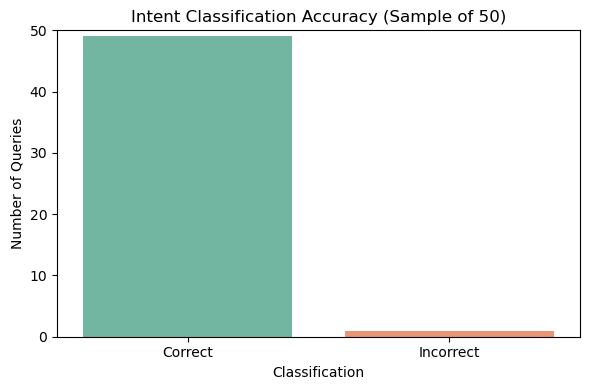

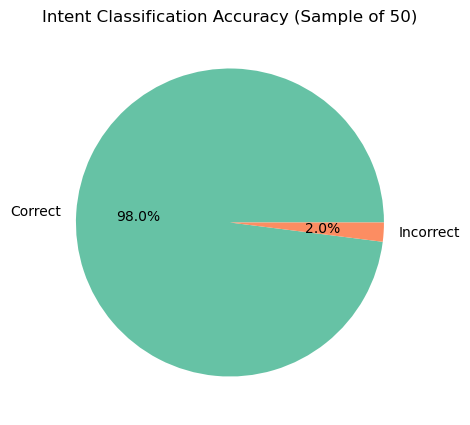

In [122]:
# Visualization: Intent classification accuracy for sample of 50 queries
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 50 queries from evaluation_queries (if more than 50 available)
sample_size = 50
sample_results = results[:sample_size] if len(results) >= sample_size else results

# Prepare data for visualization
intent_true = [r['expected_type'] for r in sample_results]
intent_pred = [r['detected_intent'] for r in sample_results]
intent_correct = [t == p for t, p in zip(intent_true, intent_pred)]

# Count correct and incorrect classifications
correct_count = sum(intent_correct)
incorrect_count = sample_size - correct_count

plt.figure(figsize=(6,4))
sns.barplot(x=['Correct','Incorrect'], y=[correct_count, incorrect_count], palette='Set2')
plt.title('Intent Classification Accuracy (Sample of 50)')
plt.ylabel('Number of Queries')
plt.xlabel('Classification')
plt.ylim(0, sample_size)
plt.tight_layout()
plt.show()

# Optional: Pie chart for proportion
plt.figure(figsize=(5,5))
plt.pie([correct_count, incorrect_count], labels=['Correct','Incorrect'], autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'])
plt.title('Intent Classification Accuracy (Sample of 50)')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_22360\1738552039.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intent_counts.index, y=intent_counts.values, palette='Set2')


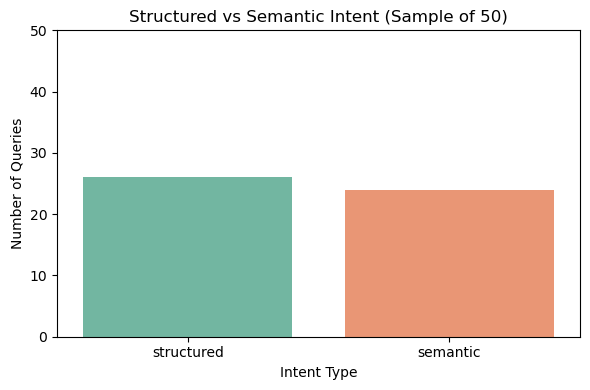

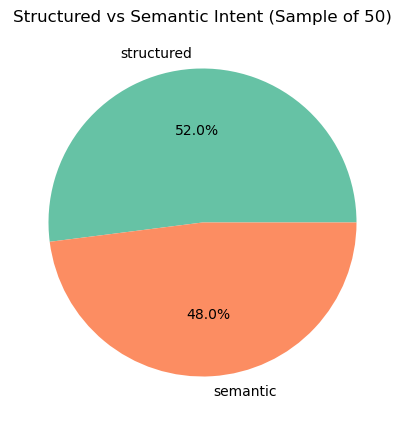

In [123]:
# Visualization: Structured vs Semantic intent distribution (Sample of 50 queries)
import matplotlib.pyplot as plt
import seaborn as sns

sample_size = 50
sample_results = results[:sample_size] if len(results) >= sample_size else results

intent_pred = [r['detected_intent'] for r in sample_results]
intent_counts = pd.Series(intent_pred).value_counts()

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=intent_counts.index, y=intent_counts.values, palette='Set2')
plt.title('Structured vs Semantic Intent (Sample of 50)')
plt.ylabel('Number of Queries')
plt.xlabel('Intent Type')
plt.ylim(0, sample_size)
plt.tight_layout()
plt.show()

# Pie chart
plt.figure(figsize=(5,5))
plt.pie(intent_counts.values, labels=intent_counts.index, autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'])
plt.title('Structured vs Semantic Intent (Sample of 50)')
plt.show()

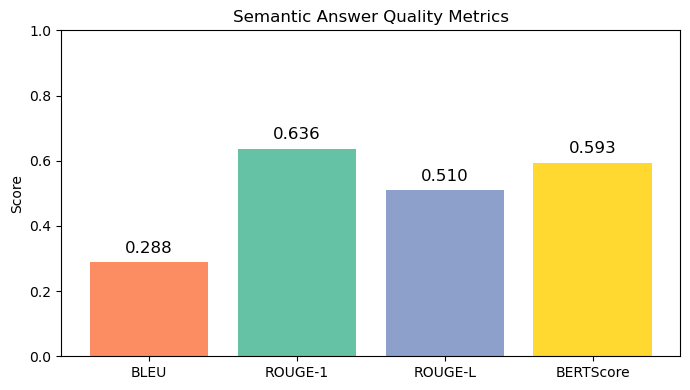

In [124]:
import matplotlib.pyplot as plt

# Metric names and scores
metrics = ['BLEU', 'ROUGE-1', 'ROUGE-L', 'BERTScore']
scores = [0.288, 0.636, 0.51, 0.593]

plt.figure(figsize=(7,4))
bars = plt.bar(metrics, scores, color=['#fc8d62', '#66c2a5', '#8da0cb', '#ffd92f'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Semantic Answer Quality Metrics')
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, score + 0.02, f'{score:.3f}', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()